In [69]:
# Importing Libraries

import math
import numpy as np
from time import time
import matplotlib.pyplot as plt 

In [2]:
# activation function and its derivative

def relu(x):
    return np.maximum(x,0)

def d_relu(x):
    return np.greater(x, 0).astype(int)

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x) ** 2

def sigmoid(x):
    return np.array([1 / (1 + math.exp(-i)) for i in x])

def d_sigmoid(x):
    return sigmoid(x) * 1-sigmoid(x)

In [3]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def d_mse(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

def binary_cross_entropy(y_true, y_pred):
    if y_true == 1:
        return - np.log(y_pred)
    else:
        return - np.log(1-y_pred)

def d_binary_cross_entropy(y_true, y_pred):
    if y_true == 1:
        return np.array(-1/ y_pred)
    else:
        return np.array(1/(1-y_pred))

In [4]:
# inherit from base class Layer
class FCLayer:
    def __init__(self, input_size, output_size,activation):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5
        if activation == "relu":
            self.activation = relu
            self.activation_prime = d_relu
        if activation == "sigmoid":
            self.activation = sigmoid
            self.activation_prime = d_sigmoid
        if activation == "tanh":
            self.activation = tanh
            self.activation_prime = d_tanh

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.neuron_output = np.dot(self.input, self.weights) + self.bias
        self.activation_output = self.activation(self.neuron_output)
        return self.activation_output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        activation_error = self.activation_prime(self.neuron_output) * output_error
        input_error = np.dot(activation_error, self.weights.T)
        weights_error = np.dot(self.input.T, activation_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * activation_error
        return input_error

In [5]:
class MLP:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.d_loss = None

    # add layer to network
    def add_layer(self, layer):
        self.layers.append(layer)

    # set loss to use
    def compile(self, loss):
        if loss == 'mse':
            self.loss = mse
            self.d_loss = d_mse
        if loss == 'binary_cross_entropy':
            self.loss = binary_cross_entropy
            self.d_loss = d_binary_cross_entropy

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        result = []
        # run network over all samples
        for i in range(len(input_data)):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(len(x_train)):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)

                err += self.loss(y_train[j], output)

                # backward propagation
                error = np.array(self.d_loss(y_train[j], output)).reshape(1, 1)

                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
            err /= len(x_train)

In [6]:
# Loading the input data as x-train and y_train

input_array = np.loadtxt("dataset/data_banknote_authentication.txt",delimiter=',')
np.random.shuffle(input_array)
x_train = input_array[:,:-1]
x_train = np.reshape(x_train,(-1,1,4))
y_train = input_array[:,-1]
y_train = np.reshape(y_train,(-1,1,1))

In [7]:
Output_file = open("output.txt","w+")

In [8]:
hyperparameters = [
     # Accuracy vs layers and neurone [1-10][2-10]
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":2,"no_neurons":2,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":3,"no_neurons":3,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":4,"no_neurons":4,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":5,"no_neurons":5,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":6,"no_neurons":6,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":7,"no_neurons":7,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":8,"no_neurons":8,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":9,"no_neurons":9,"loss":"mse","epochs":500,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":10,"no_neurons":10,"loss":"mse","epochs":500,"learning_rate":0.1},


    # Accuracy vs activation function in hidden layer [tanh,relu]
    {"hl_act": "relu","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},

    # Accuracy vs activation function in output layer [tanh,sigmoid,relu]
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "sigmoid","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},

    # Accuracy vs learning rate [0.1-0.9]
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.2},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.3},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.4},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.5},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.6},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.7},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.8},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.9},

    # Accuracy vs epoch [1-1000,100]
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":100,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":200,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":400,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":600,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":800,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},

    # Accuracy vs loss [mse,log]
    {"hl_act": "tanh","ol_act": "relu","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "tanh","no_hiddenlayers":3,"no_neurons":4,"loss":"mse","epochs":1000,"learning_rate":0.1},
    {"hl_act": "tanh","ol_act": "sigmoid","no_hiddenlayers":3,"no_neurons":4,"loss":"binary_cross_entropy","epochs":1000,"learning_rate":0.1},
]

In [9]:
avg_acccuracy = []
avg_total_time = []

In [10]:
for set_index,set in enumerate(hyperparameters):
    print(f"Training on set :  {set}\n")
    Output_file.write(f"Training on set :  {set}\n\n")
    acc_set_10 = []
    total_time_10 = []
    for i in range(10):
        # start time
        start = time()
        print(f"Random Weights Training subset {i + 1} Processing...\n")
        model = MLP()
        model.add_layer(FCLayer(x_train.shape[-1], set["no_neurons"], set["hl_act"]))
        for l in range(set["no_hiddenlayers"]):
            model.add_layer(FCLayer(set["no_neurons"], set["no_neurons"], set["hl_act"]))
        model.add_layer(FCLayer(set["no_neurons"], 1, set["ol_act"]))
        model.compile(set["loss"])
        model.fit(x_train=x_train, y_train=y_train,epochs=set["epochs"], learning_rate=set["learning_rate"])

        pred = model.predict(x_train)

        # end time
        total_time_10.append (time() - start)
        acc_set_10.append(np.around(pred, 0) == y_train)
        Output_file.write(f"Random Weights Training subset {i + 1} Processed \n")

    # avg_acc_set_10.append(avg)

    avg_acccuracy.append({f"set-{set_index}":np.mean(acc_set_10)})
    avg_total_time.append({f"set-{set_index}":np.mean(total_time_10)})

    print(f"\nAverage Accuracy of a sets over 10 Training (random weights) : {avg_acccuracy[-1]}")
    print( f"\nAverage Time taken to run that sets over 10 Training (random weights) : {avg_total_time[-1]} seconds \n\n")

    Output_file.write(f"\nAverage Accuracy of a sets over 10 Training (random weights) : {avg_acccuracy[-1]}")
    Output_file.write (f"\nAverage Time taken to run that sets over 10 Training (random weights) : {avg_total_time} seconds \n\n")

Output_file.close()

Training on set :  {'hl_act': 'tanh', 'ol_act': 'relu', 'no_hiddenlayers': 2, 'no_neurons': 2, 'loss': 'mse', 'epochs': 500, 'learning_rate': 0.1}

Random Weights Training subset 1 Processing...

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weights Training subset 5 Processing...

Random Weights Training subset 6 Processing...

Random Weights Training subset 7 Processing...

Random Weights Training subset 8 Processing...

Random Weights Training subset 9 Processing...

Random Weights Training subset 10 Processing...


Average Accuracy of a sets over 10 Training (random weights) : {'set-0': 0.7325072886297376}

Average Time taken to run that sets over 10 Training (random weights) : {'set-0': 39.749906945228574} seconds 


Training on set :  {'hl_act': 'tanh', 'ol_act': 'relu', 'no_hiddenlayers': 3, 'no_neurons': 3, 'loss': 'mse', 'epochs': 500, 'learning_rate': 0.1}

Random Weights 

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weights Training subset 5 Processing...

Random Weights Training subset 6 Processing...

Random Weights Training subset 7 Processing...

Random Weights Training subset 8 Processing...

Random Weights Training subset 9 Processing...

Random Weights Training subset 10 Processing...


Average Accuracy of a sets over 10 Training (random weights) : {'set-10': 1.0}

Average Time taken to run that sets over 10 Training (random weights) : {'set-10': 92.56620628833771} seconds 


Training on set :  {'hl_act': 'tanh', 'ol_act': 'tanh', 'no_hiddenlayers': 3, 'no_neurons': 4, 'loss': 'mse', 'epochs': 1000, 'learning_rate': 0.1}

Random Weights Training subset 1 Processing...

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weights Training subset 5

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weights Training subset 5 Processing...

Random Weights Training subset 6 Processing...

Random Weights Training subset 7 Processing...

Random Weights Training subset 8 Processing...

Random Weights Training subset 9 Processing...

Random Weights Training subset 10 Processing...


Average Accuracy of a sets over 10 Training (random weights) : {'set-20': 0.4446064139941691}

Average Time taken to run that sets over 10 Training (random weights) : {'set-20': 91.5641494512558} seconds 


Training on set :  {'hl_act': 'tanh', 'ol_act': 'tanh', 'no_hiddenlayers': 3, 'no_neurons': 4, 'loss': 'mse', 'epochs': 1000, 'learning_rate': 0.8}

Random Weights Training subset 1 Processing...

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weights Tra

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weights Training subset 5 Processing...

Random Weights Training subset 6 Processing...

Random Weights Training subset 7 Processing...

Random Weights Training subset 8 Processing...

Random Weights Training subset 9 Processing...

Random Weights Training subset 10 Processing...


Average Accuracy of a sets over 10 Training (random weights) : {'set-30': 1.0}

Average Time taken to run that sets over 10 Training (random weights) : {'set-30': 91.95424673557281} seconds 


Training on set :  {'hl_act': 'tanh', 'ol_act': 'sigmoid', 'no_hiddenlayers': 3, 'no_neurons': 4, 'loss': 'binary_cross_entropy', 'epochs': 1000, 'learning_rate': 0.1}

Random Weights Training subset 1 Processing...

Random Weights Training subset 2 Processing...

Random Weights Training subset 3 Processing...

Random Weights Training subset 4 Processing...

Random Weigh

In [66]:
X_no_hiddenlayers_neurons =[]
for set in hyperparameters[:9]:
    X_no_hiddenlayers_neurons.append(set["no_hiddenlayers"])
print(X_no_hiddenlayers_neurons)

Y_accuracy = []
Y_Avg_time = []
for set in avg_acccuracy[:9]:
    for key, value in set.items():
        Y_accuracy.append(np.around(value, 2))
for set in avg_total_time[:9]:
    for key, value in set.items():
        Y_Avg_time.append(np.around(value, 2))
print(Y_accuracy)
print (Y_Avg_time)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


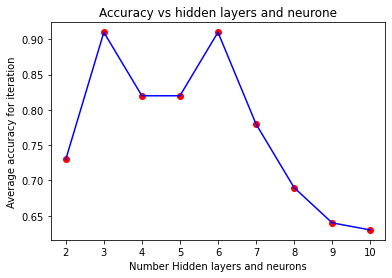

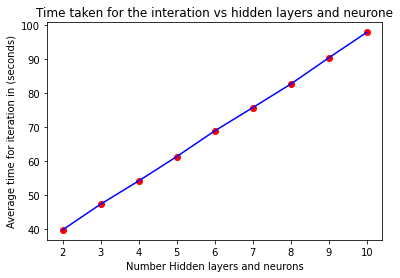

In [78]:
plt.scatter(X_no_hiddenlayers_neurons, Y_accuracy, color = 'red')
plt.plot(X_no_hiddenlayers_neurons, Y_accuracy, color = 'blue' )
plt.title('Accuracy vs hidden layers and neurone')
plt.xlabel('Number Hidden layers and neurons')
plt.ylabel('Average accuracy for iteration')
plt.show()

plt.scatter(X_no_hiddenlayers_neurons, Y_Avg_time, color = 'red')
plt.plot(X_no_hiddenlayers_neurons, Y_Avg_time, color = 'blue' )
plt.title('Time taken for the interation vs hidden layers and neurone')
plt.xlabel('Number Hidden layers and neurons')
plt.ylabel('Average time for iteration in (seconds)')
plt.show()

In [83]:
X_hl_act =[]
for set in hyperparameters[9:11]:
    X_hl_act.append(set["hl_act"])
print(X_hl_act)

Y_accuracy = []
Y_Avg_time = []
for set in avg_acccuracy[9:11]:
    for key, value in set.items():
        Y_accuracy.append(np.around(value, 2))
for set in avg_total_time[9:11]:
    for key, value in set.items():
        Y_Avg_time.append(np.around(value, 2))
print(Y_accuracy)
print (Y_Avg_time)

['relu', 'tanh']
[0.94, 1.0]
[100.14, 92.57]


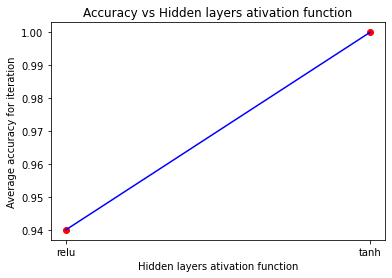

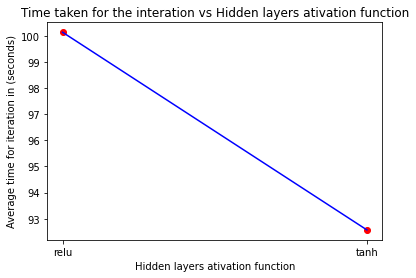

In [84]:
plt.scatter(X_hl_act, Y_accuracy, color = 'red')
plt.plot(X_no_hiddenlayers_neurons, Y_accuracy, color = 'blue' )
plt.title('Accuracy vs Hidden layers ativation function')
plt.xlabel('Hidden layers ativation function')
plt.ylabel('Average accuracy for iteration')
plt.show()

plt.scatter(X_hl_act, Y_Avg_time, color = 'red')
plt.plot(X_no_hiddenlayers_neurons, Y_Avg_time, color = 'blue' )
plt.title('Time taken for the interation vs Hidden layers ativation function')
plt.xlabel('Hidden layers ativation function')
plt.ylabel('Average time for iteration in (seconds)')
plt.show()

In [87]:
X_ol_act =[]
for set in hyperparameters[11:14]:
    X_ol_act.append(set["ol_act"])
print(X_ol_act)

Y_accuracy = []
Y_Avg_time = []
for set in avg_acccuracy[11:14]:
    for key, value in set.items():
        Y_accuracy.append(np.around(value, 2))
for set in avg_total_time[11:14]:
    for key, value in set.items():
        Y_Avg_time.append(np.around(value, 2))
print(Y_accuracy)
print (Y_Avg_time)

['tanh', 'sigmoid', 'relu']
[1.0, 0.48, 0.78]
[92.49, 106.78, 94.8]


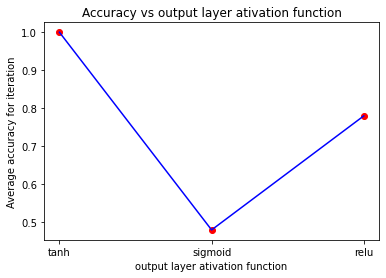

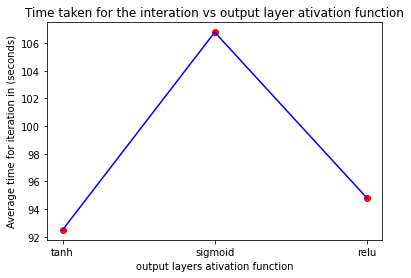

In [91]:
plt.scatter(X_ol_act, Y_accuracy, color = 'red')
plt.plot(X_ol_act, Y_accuracy, color = 'blue' )
plt.title('Accuracy vs output layer ativation function')
plt.xlabel('output layer ativation function')
plt.ylabel('Average accuracy for iteration')
plt.show()

plt.scatter(X_ol_act, Y_Avg_time, color = 'red')
plt.plot(X_ol_act, Y_Avg_time, color = 'blue' )
plt.title('Time taken for the interation vs output layer ativation function')
plt.xlabel('output layers ativation function')
plt.ylabel('Average time for iteration in (seconds)')
plt.show()

In [92]:
X_learning_rate =[]
for set in hyperparameters[14:23]:
    X_learning_rate.append(set["learning_rate"])
print(X_learning_rate)

Y_accuracy = []
Y_Avg_time = []
for set in avg_acccuracy[14:23]:
    for key, value in set.items():
        Y_accuracy.append(np.around(value, 2))
for set in avg_total_time[14:23]:
    for key, value in set.items():
        Y›_Avg_time.append(np.around(value, 2))
print(Y_accuracy)
print (Y_Avg_time)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[1.0, 1.0, 1.0, 0.98, 0.54, 0.46, 0.44, 0.44, 0.44]
[92.32, 92.65, 92.11, 92.15, 91.92, 91.67, 91.56, 91.6, 92.08]


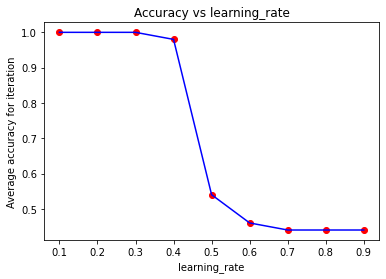

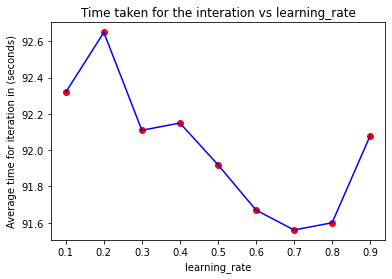

In [93]:
plt.scatter(X_learning_rate, Y_accuracy, color = 'red')
plt.plot(X_learning_rate, Y_accuracy, color = 'blue' )
plt.title('Accuracy vs learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('Average accuracy for iteration')
plt.show()

plt.scatter(X_learning_rate, Y_Avg_time, color = 'red')
plt.plot(X_learning_rate, Y_Avg_time, color = 'blue' )
plt.title('Time taken for the interation vs learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('Average time for iteration in (seconds)')
plt.show()

In [94]:
X_epochs =[]
for set in hyperparameters[23:29]:
    X_epochs.append(set["epochs"])
print(X_epochs)

Y_accuracy = []
Y_Avg_time = []
for set in avg_acccuracy[23:29]:
    for key, value in set.items():
        Y_accuracy.append(np.around(value, 2))
for set in avg_total_time[23:29]:
    for key, value in set.items():
        Y_Avg_time.append(np.around(value, 2))
print(Y_accuracy)
print (Y_Avg_time)

[100, 200, 400, 600, 800, 1000]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[9.31, 18.38, 37.09, 55.66, 73.84, 92.04]


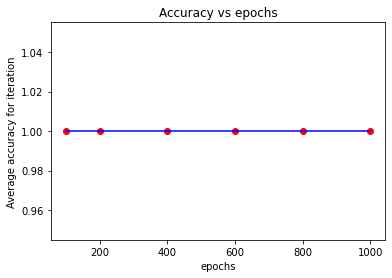

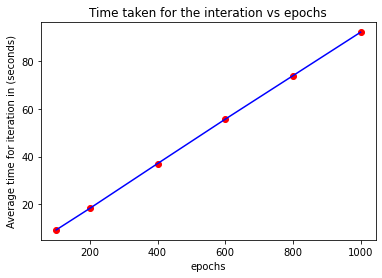

In [97]:
plt.scatter(X_epochs, Y_accuracy, color = 'red')
plt.plot(X_epochs, Y_accuracy, color = 'blue' )
plt.title('Accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('Average accuracy for iteration')
plt.show()

plt.scatter(X_epochs, Y_Avg_time, color = 'red')
plt.plot(X_epochs, Y_Avg_time, color = 'blue' )
plt.title('Time taken for the interation vs epochs')
plt.xlabel('epochs')
plt.ylabel('Average time for iteration in (seconds)')
plt.show()

In [98]:
X_loss =[]
for set in hyperparameters[29:]:
    X_loss.append(set["loss"])
print(X_loss)

Y_accuracy = []
Y_Avg_time = []
for set in avg_acccuracy[29:]:
    for key, value in set.items():
        Y_accuracy.append(np.around(value, 2))
for set in avg_total_time[23:29]:
    for key, value in set.items():
        Y_Avg_time.append(np.around(value, 2))
print(Y_accuracy)
print (Y_Avg_time)

['mse', 'mse', 'binary_cross_entropy']
[0.82, 1.0, 0.49]
[9.31, 18.38, 37.09, 55.66, 73.84, 92.04]


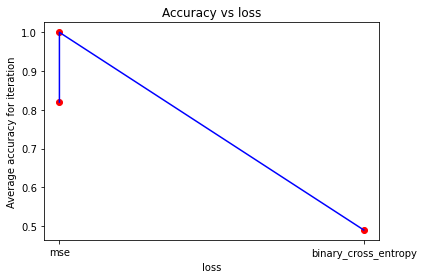

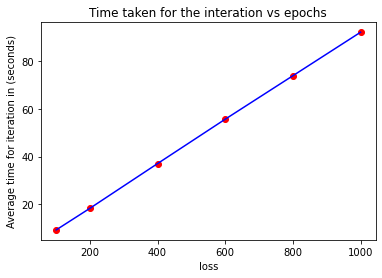

In [103]:
plt.scatter(X_loss, Y_accuracy, color = 'red')
plt.plot(X_loss, Y_accuracy, color = 'blue' )
plt.title('Accuracy vs loss')
plt.xlabel('loss')
plt.ylabel('Average accuracy for iteration')
plt.show()

plt.scatter(X_epochs, Y_Avg_time, color = 'red')
plt.plot(X_epochs, Y_Avg_time, color = 'blue' )
plt.title('Time taken for the interation vs epochs')
plt.xlabel('loss')
plt.ylabel('Average time for iteration in (seconds)')
plt.show()